<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/_ComparacaoCarteiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 8.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=30a56c4eeafa4d0528ec3ec551569d5b6a8d22a9c652dacf4ffa4f38c619b365
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
ativos=[
        'PETR4.SA',
        'VALE3.SA',
        'WEGE3.SA',
        'RADL3.SA',
        'OIBR3.SA',
        'KNRI11.SA',
        'SMAL11.SA',
        'AAPL34.SA',
        'IVVB11.SA',
        'ETH-USD',
        'USDBRL=X'
]

In [4]:
inicio = '2020-05-01'
fim = '2021-08-15'

In [6]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start=inicio, end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

In [8]:
precos = precos.drop(columns=['ETH-USD'])

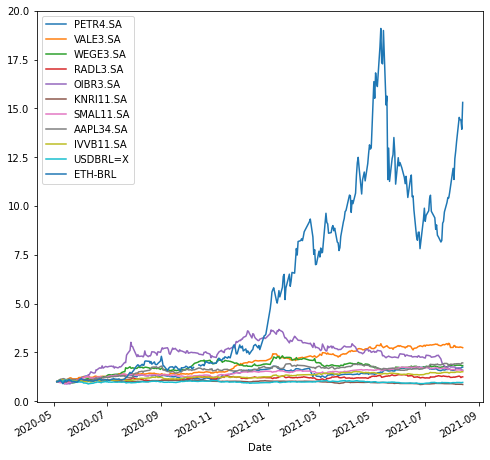

In [10]:
normalizado = precos/precos.iloc[0]
normalizado.plot(figsize=(8,8))

In [12]:
compras = {
   'PETR4.SA':1000,
        'VALE3.SA':700,
        'WEGE3.SA':1500,
        'RADL3.SA':700,
        'OIBR3.SA':200,
        'KNRI11.SA':700,
        'SMAL11.SA':1500,
        'AAPL34.SA':2000,
        'IVVB11.SA':1500,
        'ETH-USD':200,

}

In [13]:
compras_df = pd.Series(data=compras, index=list(compras.keys()))

In [14]:
sum(compras.values())

10000

In [15]:
primeiro = precos.iloc[0]

In [18]:
qtd_acoes = compras_df/primeiro

In [19]:
PL = precos*qtd_acoes

In [21]:
PL.head(3)

,AAPL34.SA,ETH-BRL,ETH-USD,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,USDBRL=X,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,
2020-05-04,2000.000000,NaN,NaN,1500.000000,700.000000,200.000000,1000.000000,700.000000,1500.000000,NaN,700.000000,1500.000000
2020-05-05,2059.369090,NaN,NaN,1526.950431,702.685449,205.882347,1032.221098,696.987266,1479.377360,NaN,696.335118,1468.750176
2020-05-06,2137.167589,NaN,NaN,1548.315577,717.231486,205.882347,994.246331,693.037478,1462.333842,NaN,706.373761,1461.973107


In [22]:
PL['PL Total']=PL.iloc[:].sum(axis=1)

In [23]:
PL.head()

,AAPL34.SA,ETH-BRL,ETH-USD,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,USDBRL=X,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2020-05-04,2000.000000,NaN,NaN,1500.000000,700.000000,200.000000,1000.000000,700.000000,1500.000000,NaN,700.000000,1500.000000,9800.000000
2020-05-05,2059.369090,NaN,NaN,1526.950431,702.685449,205.882347,1032.221098,696.987266,1479.377360,NaN,696.335118,1468.750176,9868.558335
2020-05-06,2137.167589,NaN,NaN,1548.315577,717.231486,205.882347,994.246331,693.037478,1462.333842,NaN,706.373761,1461.973107,9926.561519
2020-05-07,2199.999886,NaN,NaN,1622.340455,716.112560,197.058826,1003.452454,694.175587,1431.655459,NaN,733.780947,1471.762093,10070.338267
2020-05-08,2220.108426,NaN,NaN,1602.393646,727.301819,202.941174,1063.291199,700.803383,1433.359785,NaN,778.397410,1439.759181,10168.356020


In [25]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [26]:
ibov.rename(columns={'Adj Close':'IBOV'},inplace=True)

In [27]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis=1)

In [28]:
ibov.index = pd.to_datetime(ibov.index)

In [29]:
PL.index = pd.to_datetime(PL.index)

In [30]:
novo_df = pd.merge(ibov, PL, how = 'inner', on='Date')

In [32]:
novo_df.head()

,IBOV,AAPL34.SA,ETH-BRL,ETH-USD,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,USDBRL=X,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,,
2020-05-04,78876.0,2000.000000,NaN,NaN,1500.000000,700.000000,200.000000,1000.000000,700.000000,1500.000000,NaN,700.000000,1500.000000,9800.000000
2020-05-05,79471.0,2059.369090,NaN,NaN,1526.950431,702.685449,205.882347,1032.221098,696.987266,1479.377360,NaN,696.335118,1468.750176,9868.558335
2020-05-06,79064.0,2137.167589,NaN,NaN,1548.315577,717.231486,205.882347,994.246331,693.037478,1462.333842,NaN,706.373761,1461.973107,9926.561519
2020-05-07,78119.0,2199.999886,NaN,NaN,1622.340455,716.112560,197.058826,1003.452454,694.175587,1431.655459,NaN,733.780947,1471.762093,10070.338267
2020-05-08,80263.0,2220.108426,NaN,NaN,1602.393646,727.301819,202.941174,1063.291199,700.803383,1433.359785,NaN,778.397410,1439.759181,10168.356020


In [33]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [34]:
PL_normalizado.head()

,IBOV,AAPL34.SA,ETH-BRL,ETH-USD,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,USDBRL=X,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,,
2020-05-04,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000
2020-05-05,1.007543,1.029685,NaN,NaN,1.017967,1.003836,1.029412,1.032221,0.995696,0.986252,NaN,0.994764,0.979167,1.006996
2020-05-06,1.002383,1.068584,NaN,NaN,1.032210,1.024616,1.029412,0.994246,0.990054,0.974889,NaN,1.009105,0.974649,1.012914
2020-05-07,0.990403,1.100000,NaN,NaN,1.081560,1.023018,0.985294,1.003452,0.991679,0.954437,NaN,1.048258,0.981175,1.027586
2020-05-08,1.017585,1.110054,NaN,NaN,1.068262,1.039003,1.014706,1.063291,1.001148,0.955573,NaN,1.111996,0.959839,1.037587


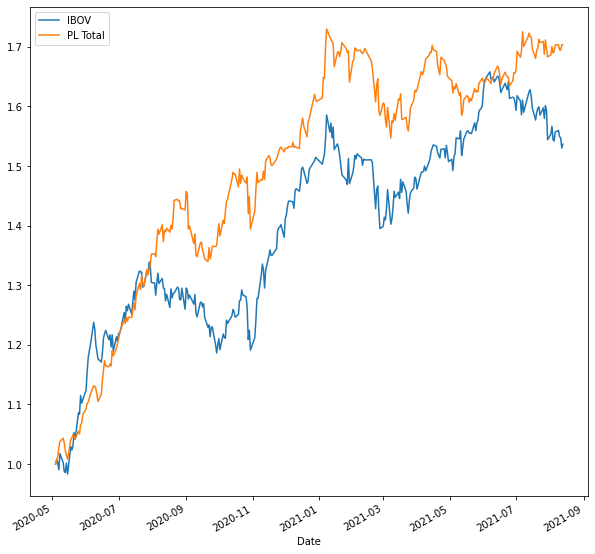

In [35]:
PL_normalizado[['IBOV','PL Total']].plot(figsize=(10,10))